### Cognitive Modeling (02458): Homework 1 - Part 1: Psychophysics

---

_By Sebastian Sbirna (s190553) and Aleksander Frese (s163859)_

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

To perform this experiment, we select an interval of brightness intensity stimuli (i.e. *luminance*) from 1 to 10 while gradually increasing the stimulus by 1 each time.

In [2]:
luminance = np.arange(1, 11, 1)

Steven's law ($\psi = k* \phi^s $) allows us to determine the perceived brightness at the eye of an observant. That was found to be (for $\phi = luminance$ and $s = 0.33$):

In [3]:
perc_brightness_stevens = 10 * np.power(luminance, 0.33)
perc_brightness_stevens

array([10.        , 12.57013375, 14.36977652, 15.80082624, 17.00826843,
       18.06300128, 19.00563363, 19.86184991, 20.64904773, 21.3796209 ])

Plotting the stimulus intensity against the measured response, we observe a logarithmic relationship for brightness stimuli:

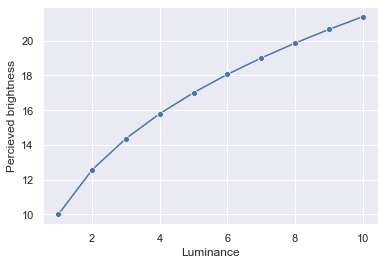

In [4]:
# plt.plot(luminance, perc_brightness_stevens);
sns.lineplot(luminance, perc_brightness_stevens, markers = True, marker = "o")
plt.xlabel('Luminance');
plt.ylabel('Percieved brightness');

Trying to compare this result against Fechner's earlier theory, let us construct our matrices X and Y needed for determination of the two unknown variables in Fechner's law: `k` and `threshold`. Fechner's law dictates that: $\psi = k * log(\frac{\phi}{threshold}) $

X will be the matrix of 10 lines and 2 columns, with one column indicating the stimulus levels of luminance (which will be multiplied with the slope `a = k` of the line), and the other column being a vector of ones needed to be multiplied with the intercept (`b = -k * log(threshold)`). The intercept (and, thus, the threshold) will always be constant, therefore it is appropriate to multiply it by 1.

Y will be the matrix of results of the measured percieved stimulus, taken from Steven's law calculation.

In [5]:
X = [np.log(luminance), np.ones(10)]
X

[array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
        1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [6]:
Y = np.array(perc_brightness_stevens)
Y

array([10.        , 12.57013375, 14.36977652, 15.80082624, 17.00826843,
       18.06300128, 19.00563363, 19.86184991, 20.64904773, 21.3796209 ])

We are interested to find the matrix $\beta$ in the formula: $Y = X * \beta $, since we already have the values in X and Y. 

By multiplying the pseudoinverse of X ($X^{-1}$) with the matrix Y, we may obtain the matrix $\beta$ and the results for the slope `a` and the intercept `b`.

In [7]:
np.linalg.pinv(X).T

array([[-0.3123382 , -0.16900502, -0.08516049, -0.02567185,  0.02047113,
         0.05817269,  0.0900489 ,  0.11766133,  0.14201722,  0.1638043 ],
       [ 0.5717685 ,  0.35527216,  0.22862992,  0.13877582,  0.06907956,
         0.01213358, -0.03601357, -0.07772052, -0.11450866, -0.14741678]])

In [8]:
a, b = np.dot(np.linalg.pinv(X).T, Y)
np.dot(np.linalg.pinv(X).T, Y)

array([5.00478258, 9.31138574])

If we now have found `a`, we have simultaneously found `k`. 

To compute `threshold`, we just need to plug in `k` into the equation for `b` (whose value has just been found from the $\beta$ matrix).

In [9]:
k = a 
k

5.004782583035392

In [10]:
threshold = np.power(np.e, -b/a)
threshold

0.15559519451740833

Having all values of the model now available, let us compute the perceived brightness of observers and check how well does it fit with Stevens' more accurate model?

In [11]:
perc_brightness_fechner = k * np.log(luminance / threshold)

In [12]:
perc_brightness_fechner

array([ 9.31138574, 12.78043668, 14.80970139, 16.24948761, 17.36627257,
       18.27875233, 19.05024296, 19.71853855, 20.30801704, 20.83532351])

In [13]:
perc_brightness_stevens

array([10.        , 12.57013375, 14.36977652, 15.80082624, 17.00826843,
       18.06300128, 19.00563363, 19.86184991, 20.64904773, 21.3796209 ])

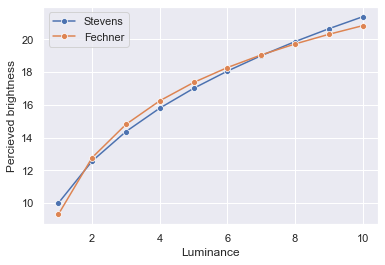

In [14]:
# plt.plot(perc_brightness_fechner);
# plt.plot(perc_brightness_stevens);
sns.lineplot(luminance, perc_brightness_stevens, markers = True, marker = "o");
sns.lineplot(luminance, perc_brightness_fechner, markers = True, marker = "o");
plt.xlabel('Luminance');
plt.ylabel('Percieved brightness');
plt.legend(labels = ['Stevens', 'Fechner']);

The results above show that, for certain stimuli which act on a logarithmic scale, Fechner's law is a good approximation of the perceived brighness response.

Now we will concentrate on another experiment, this time involving electric shock stimuli, which has been determined by Stevens to act on a power scale.

The computations are largely identical in manner to the previous experiment.

In [15]:
voltage = np.arange(1, 11, 1)

In [16]:
perc_intensity_stevens = 0.00015 * np.power(voltage, 3.3)
perc_intensity_stevens

array([1.50000000e-04, 1.47737330e-03, 5.63107614e-03, 1.45508790e-02,
       3.03873112e-02, 5.54613434e-02, 9.22390436e-02, 1.43313868e-01,
       2.11393457e-01, 2.99289347e-01])

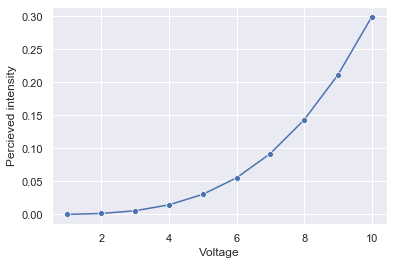

In [17]:
# plt.plot(voltage, perc_intensity_stevens);
sns.lineplot(voltage, perc_intensity_stevens, markers = True, marker = "o")
plt.xlabel('Voltage');
plt.ylabel('Percieved intensity');

In [18]:
X = [np.log(voltage), np.ones(10)]
X

[array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
        1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])]

In [19]:
Y = np.array(perc_intensity_stevens)
Y

array([1.50000000e-04, 1.47737330e-03, 5.63107614e-03, 1.45508790e-02,
       3.03873112e-02, 5.54613434e-02, 9.22390436e-02, 1.43313868e-01,
       2.11393457e-01, 2.99289347e-01])

In [20]:
np.linalg.pinv(X).T

array([[-0.3123382 , -0.16900502, -0.08516049, -0.02567185,  0.02047113,
         0.05817269,  0.0900489 ,  0.11766133,  0.14201722,  0.1638043 ],
       [ 0.5717685 ,  0.35527216,  0.22862992,  0.13877582,  0.06907956,
         0.01213358, -0.03601357, -0.07772052, -0.11450866, -0.14741678]])

In [21]:
a, b = np.dot(np.linalg.pinv(X).T, Y)
np.dot(np.linalg.pinv(X).T, Y)

array([ 0.10691369, -0.07609748])

In [22]:
k = a 
k

0.10691368822274316

In [23]:
threshold = np.power(np.e, -b/a)
threshold

2.0375854630876846

In [24]:
perc_intensity_fechner = k * np.log(voltage / threshold)

In [25]:
perc_intensity_fechner

array([-0.07609748, -0.00199055,  0.04135922,  0.07211637,  0.09597347,
        0.11546614,  0.13194696,  0.14622329,  0.15881591,  0.17008039])

In [26]:
perc_intensity_stevens

array([1.50000000e-04, 1.47737330e-03, 5.63107614e-03, 1.45508790e-02,
       3.03873112e-02, 5.54613434e-02, 9.22390436e-02, 1.43313868e-01,
       2.11393457e-01, 2.99289347e-01])

After having found our free-term variables `k` and `threshold` for this particular experiment, let us plot the graph of percieved stimulus intensities retrieved using both Stevens' and Fechner's law.

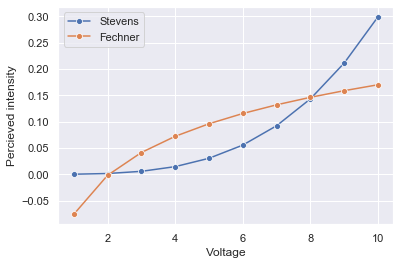

In [27]:
# plt.plot(perc_intensity_fechner);
# plt.plot(perc_intensity_stevens);
sns.lineplot(voltage, perc_intensity_stevens, markers = True, marker = "o");
sns.lineplot(voltage, perc_intensity_fechner, markers = True, marker = "o");
plt.xlabel('Voltage');
plt.ylabel('Percieved intensity');
plt.legend(labels = ['Stevens', 'Fechner']);

Exactly as argued, in this case of stimulus, we can see that the logarithmic approach of Fechner's law no longer estimates properly the trend in differences between percieved intensities of observers. Thus, we can admit that Fechner's law is only a case approximation of the perceived stimulus response in experiments where stimuli detection behaves logarithmically.